In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
import tensorflow as tf
import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
merged_n = pd.read_csv(r'/content/drive/MyDrive/Dissertation_10862121/merged_n.csv')

In [ ]:
merged_n['GMT'] = pd.to_datetime(merged_n['GMT'])
merged_n['Date'] = pd.to_datetime(merged_n['Date'])
merged_n.set_index('GMT', inplace=True)

In [ ]:
merged_n

,Total Household Consumption (N),Date,Time,Year,Month,Day,Hour,DayOfWeek,IsHoliday,Hourly Global Radiation (KJ/m2),Hourly Maximum Gust (kn),Hourly Mean Wind Direction (o),Hourly Mean Windspeed (kn),Hourly Pressure at Mean Sea Level (hPa),Hourly Rainfall Total (mm),Hourly Relative Humidity (%),Hourly Snow Depth (cm),Hourly Temperature (C),Hourly Total Cloud Cover (oktas)\n,Hourly Visibility (dm)
GMT,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1657.483601,2013-01-01,00:00:00,2013,1,1,0,1,True,0.0,13.2,232.0,7.8,999.400,0.00,92.085714,0.0,8.914286,8.000000,2133.333333
2013-01-01 01:00:00,1422.045237,2013-01-01,01:00:00,2013,1,1,1,1,True,0.0,13.6,236.0,8.0,999.675,0.00,91.042857,0.0,8.785714,8.000000,1766.666667
2013-01-01 02:00:00,1200.551314,2013-01-01,02:00:00,2013,1,1,2,1,True,0.0,13.2,246.0,7.6,999.975,0.20,92.685714,0.0,8.514286,8.000000,1333.333333
2013-01-01 03:00:00,1061.568405,2013-01-01,03:00:00,2013,1,1,3,1,True,0.0,18.6,286.0,9.0,1000.725,0.96,89.871429,0.0,7.285714,7.666667,4100.000000
2013-01-01 04:00:00,1000.474013,2013-01-01,04:00:00,2013,1,1,4,1,True,0.0,15.4,278.0,7.4,1001.300,0.08,88.585714,0.0,6.700000,4.000000,5500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,2979.858073,2013-12-31,19:00:00,2013,12,31,19,1,False,0.0,12.8,192.0,7.8,1002.900,0.00,85.385714,0.0,5.942857,6.333333,3666.666667
2013-12-31 20:00:00,2700.407931,2013-12-31,20:00:00,2013,12,31,20,1,False,0.0,13.6,196.0,7.4,1003.175,0.00,84.442857,0.0,5.442857,1.333333,4000.000000
2013-12-31 21:00:00,2447.194261,2013-12-31,21:00:00,2013,12,31,21,1,False,0.0,13.6,186.0,7.6,1003.450,0.00,83.257143,0.0,5.414286,1.000000,3833.333333


Feature Selection

In [ ]:
merged_n = merged_n.drop(columns=["Hourly Mean Windspeed (kn)"])

In [ ]:
#merged_n['consumption_diff'] = merged_n['Total Household Consumption (N)'].diff()

Feature Engineering

Lags

Consumption

In [ ]:
#Lag for the hour before
merged_n['lag_1_hour_energy'] = merged_n['Total Household Consumption (N)'].shift(1)

#Lags for the same hour for the past 7 days
for i in range(1, 8):
    merged_n[f'lag_{i}_day_energy'] = merged_n['Total Household Consumption (N)'].shift(24 * i)

Temperature

In [ ]:
#Lag for the hour before
merged_n['lag_1_hour_temp'] = merged_n['Hourly Temperature (C)'].shift(1)

#Lags for the same hour for the past 7 days
for i in range(1, 8):
    merged_n[f'lag_{i}_day_temp'] = merged_n['Hourly Temperature (C)'].shift(24 * i)

Radiation

In [ ]:
#Lag for the hour before
merged_n['lag_1_hour_rad'] = merged_n['Hourly Global Radiation (KJ/m2)'].shift(1)

#Lags for the same hour for the past 7 days
for i in range(1, 8):
    merged_n[f'lag_{i}_day_rad'] = merged_n['Hourly Global Radiation (KJ/m2)'].shift(24 * i)

Rolling Statistics - Consumption

In [ ]:
window_size = 72
merged_n['rolling_mean_consumption'] = merged_n['Total Household Consumption (N)'].rolling(window=window_size).mean()

Cyclical Features

In [ ]:
merged_n['hour_sin'] = np.sin(2 * np.pi * merged_n['Hour'] / 24)
merged_n['hour_cos'] = np.cos(2 * np.pi * merged_n['Hour'] / 24)
merged_n['month_sin'] = np.sin(2 * np.pi * merged_n['Month'] / 12)
merged_n['month_cos'] = np.cos(2 * np.pi * merged_n['Month'] / 12)

Weather Combination Variables

In [ ]:
merged_n['temp_humidity_interaction'] = merged_n['Hourly Temperature (C)'] * merged_n['Hourly Relative Humidity (%)']

In [ ]:
merged_n['temp_rad_interaction'] = merged_n['Hourly Temperature (C)'] * merged_n['Hourly Global Radiation (KJ/m2)']

Weighted Observations (More weight to more recent)

In [ ]:
alpha = 0.9
merged_n['ewm_consumption'] = merged_n['Total Household Consumption (N)'].ewm(alpha=alpha).mean()

In [ ]:
merged_n

,Total Household Consumption (N),Date,Time,Year,Month,Day,Hour,DayOfWeek,IsHoliday,Hourly Global Radiation (KJ/m2),...,lag_6_day_rad,lag_7_day_rad,rolling_mean_consumption,hour_sin,hour_cos,month_sin,month_cos,temp_humidity_interaction,temp_rad_interaction,ewm_consumption
GMT,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1657.483601,2013-01-01,00:00:00,2013,1,1,0,1,True,0.0,...,NaN,NaN,NaN,0.000000,1.000000,5.000000e-01,0.866025,820.878367,0.0,1657.483601
2013-01-01 01:00:00,1422.045237,2013-01-01,01:00:00,2013,1,1,1,1,True,0.0,...,NaN,NaN,NaN,0.258819,0.965926,5.000000e-01,0.866025,799.876531,0.0,1443.448725
2013-01-01 02:00:00,1200.551314,2013-01-01,02:00:00,2013,1,1,2,1,True,0.0,...,NaN,NaN,NaN,0.500000,0.866025,5.000000e-01,0.866025,789.152653,0.0,1224.622228
2013-01-01 03:00:00,1061.568405,2013-01-01,03:00:00,2013,1,1,3,1,True,0.0,...,NaN,NaN,NaN,0.707107,0.707107,5.000000e-01,0.866025,654.777551,0.0,1077.859111
2013-01-01 04:00:00,1000.474013,2013-01-01,04:00:00,2013,1,1,4,1,True,0.0,...,NaN,NaN,NaN,0.866025,0.500000,5.000000e-01,0.866025,593.524286,0.0,1008.211826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,2979.858073,2013-12-31,19:00:00,2013,12,31,19,1,False,0.0,...,0.0,0.0,2015.932164,-0.965926,0.258819,-2.449294e-16,1.000000,507.435102,0.0,2999.152323
2013-12-31 20:00:00,2700.407931,2013-12-31,20:00:00,2013,12,31,20,1,False,0.0,...,0.0,0.0,2015.910670,-0.866025,0.500000,-2.449294e-16,1.000000,459.610408,0.0,2730.282370
2013-12-31 21:00:00,2447.194261,2013-12-31,21:00:00,2013,12,31,21,1,False,0.0,...,0.0,0.0,2014.749179,-0.707107,0.707107,-2.449294e-16,1.000000,450.777959,0.0,2475.503072


Dropping Missing Value Rows after Feature Engineering

In [ ]:
nan_rows = merged_n[merged_n.isna().any(axis=1)]
print(nan_rows)

                     Total Household Consumption (N)       Date      Time  \
GMT                                                                         
2013-01-01 00:00:00                      1657.483601 2013-01-01  00:00:00   
2013-01-01 01:00:00                      1422.045237 2013-01-01  01:00:00   
2013-01-01 02:00:00                      1200.551314 2013-01-01  02:00:00   
2013-01-01 03:00:00                      1061.568405 2013-01-01  03:00:00   
2013-01-01 04:00:00                      1000.474013 2013-01-01  04:00:00   
...                                              ...        ...       ...   
2013-01-07 19:00:00                      3280.629072 2013-01-07  19:00:00   
2013-01-07 20:00:00                      3058.461423 2013-01-07  20:00:00   
2013-01-07 21:00:00                      2807.599418 2013-01-07  21:00:00   
2013-01-07 22:00:00                      2391.359339 2013-01-07  22:00:00   
2013-01-07 23:00:00                      1747.291311 2013-01-07  23:00:00   

In [ ]:
merged_n.dropna(inplace=True)

In [ ]:
merged_n['IsHoliday'] = merged_n['IsHoliday'].astype(int)

In [ ]:
non_num_columns = merged_n.select_dtypes(exclude=['int64', 'float64']).columns
print(non_num_columns)

Index(['Date', 'Time'], dtype='object')


In [ ]:
#Dropping columns that aren't numerical (needed for model input)
merged_n= merged_n.drop(columns=['Date', 'Time'])

In [ ]:
non_num_columns = merged_n.select_dtypes(exclude=['int64', 'float64']).columns
print(non_num_columns)

Index([], dtype='object')


Standard Scaler

In [ ]:
#Selecting numerical columns
numerical_cols = merged_n.select_dtypes(include=['float64', 'int64']).columns

#Applying StandardScaler
standard_scaler = StandardScaler()
merged_n_standard = merged_n.copy()
merged_n_standard[numerical_cols] = standard_scaler.fit_transform(merged_n[numerical_cols])

MinMaxScaler

In [ ]:
minmax_scaler = MinMaxScaler()
merged_n_minmax = merged_n.copy()
merged_n_minmax[numerical_cols] = minmax_scaler.fit_transform(merged_n[numerical_cols])

Data Preparation

Train/Test Split

In [ ]:
end_of_october = merged_n.index.get_loc('2013-10-31').stop - 1
end_of_october

7127

In [ ]:
X = merged_n_standard.drop('Total Household Consumption (N)', axis=1).values
y = merged_n_standard['Total Household Consumption (N)'].values

#Data generation function
def generate_dataset(X, y, time_steps=168, out_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - out_steps):
        v = X[i:i + time_steps]
        Xs.append(v)
        ys.append(y[i + time_steps:i + time_steps + out_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 24
OUT_STEPS = 1

X_data, y_data = generate_dataset(X, y, TIME_STEPS, OUT_STEPS)

split_index = end_of_october - TIME_STEPS + 1

X_train = X_data[:split_index]
X_test = X_data[split_index:]

y_train = y_data[:split_index]
y_test = y_data[split_index:]

LSTM Build-up

In [ ]:
model = Sequential()
model.add(LSTM(70, activation='relu', input_shape=(TIME_STEPS, X_data.shape[2]), return_sequences=True))
model.add(LSTM(70, activation='relu'))
model.add(Dense(OUT_STEPS))
model.compile(optimizer='adam', loss='mae')

Training the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2, shuffle=False)

Epoch 1/40
178/178 [==============================] - 7s 30ms/step - loss: 0.4702 - val_loss: 0.3679
Epoch 2/40
178/178 [==============================] - 4s 24ms/step - loss: 0.2685 - val_loss: 0.2362
Epoch 3/40
178/178 [==============================] - 4s 23ms/step - loss: 0.1821 - val_loss: 0.2248
Epoch 4/40
178/178 [==============================] - 5s 29ms/step - loss: 0.1721 - val_loss: 0.1997
Epoch 5/40
178/178 [==============================] - 4s 23ms/step - loss: 0.1616 - val_loss: 0.2130
Epoch 6/40
178/178 [==============================] - 4s 23ms/step - loss: 0.1425 - val_loss: 0.1922
Epoch 7/40
178/178 [==============================] - 5s 29ms/step - loss: 0.1319 - val_loss: 0.1691
Epoch 8/40
178/178 [==============================] - 4s 23ms/step - loss: 0.1181 - val_loss: 0.1697
Epoch 9/40
178/178 [==============================] - 4s 23ms/step - loss: 0.1177 - val_loss: 0.1371
Epoch 10/40
178/178 [==============================] - 5s 29ms/step - loss: 0.1008 - val_lo

Test Set Forecast

In [ ]:
forecasts = []

#Looping through the test set and predicting step by step (walk-forward validation approach)
for i in range(len(X_test)):
    last_sequence = X_test[i].reshape(1, TIME_STEPS, X_data.shape[2])
    forecast = model.predict(last_sequence)
    forecasts.append(forecast[0][0])

1/1 [==============================] - 0s 22ms/step


Predicting the last 2 months or last 61 days peak day value and peak day hour

---



In [ ]:
peak_values = []
peak_hours = []

#Iterating every 24 hours for daily peak
for i in range(0, len(forecasts), 24):
    daily_forecasts = forecasts[i:i+24]
    peak_hour = np.argmax(daily_forecasts)
    peak_value = daily_forecasts[peak_hour]

    peak_values.append(peak_value)
    peak_hours.append(peak_hour)

for i, (peak, hour) in enumerate(zip(peak_values, peak_hours)):
    print(f"Day {i+1}: Peak consumption of {peak} at hour {hour}.")

Day 1: Peak consumption of 1.5407938957214355 at hour 18.
Day 2: Peak consumption of 1.6694716215133667 at hour 18.
Day 3: Peak consumption of 2.046198606491089 at hour 18.
Day 4: Peak consumption of 1.9249199628829956 at hour 18.
Day 5: Peak consumption of 1.9145305156707764 at hour 18.
Day 6: Peak consumption of 1.8295146226882935 at hour 18.
Day 7: Peak consumption of 1.69437837600708 at hour 19.
Day 8: Peak consumption of 1.8111721277236938 at hour 18.
Day 9: Peak consumption of 2.0181751251220703 at hour 18.
Day 10: Peak consumption of 2.1090824604034424 at hour 18.
Day 11: Peak consumption of 1.9524579048156738 at hour 18.
Day 12: Peak consumption of 1.8363139629364014 at hour 19.
Day 13: Peak consumption of 1.9167683124542236 at hour 19.
Day 14: Peak consumption of 1.8229480981826782 at hour 19.
Day 15: Peak consumption of 1.786193609237671 at hour 19.
Day 16: Peak consumption of 1.8774057626724243 at hour 18.
Day 17: Peak consumption of 2.1443231105804443 at hour 17.
Day 18: Pe

Predicting the last 2 months or last 61 days peak day value and peak day hour in Original Scaled values.

In [ ]:
#Creating a separate scaler for the target variable
target_scaler = StandardScaler()
merged_n_standard['Total Household Consumption (N)'] = target_scaler.fit_transform(merged_n[['Total Household Consumption (N)']])

In [ ]:
#Transforming forecasts back to original scale
forecasts_original = target_scaler.inverse_transform(np.array(forecasts).reshape(-1, 1)).flatten()

In [ ]:
#Transforming peak_values back to original scale
peak_values_original = target_scaler.inverse_transform(np.array(peak_values).reshape(-1, 1)).flatten()

In [ ]:
for i, (peak, hour) in enumerate(zip(peak_values_original, peak_hours)):
    print(f"Day {i+1}: Peak consumption of {peak} at hour {hour}.")

Day 1: Peak consumption of 2694.19921875 at hour 18.
Day 2: Peak consumption of 2774.170166015625 at hour 18.
Day 3: Peak consumption of 3008.2998046875 at hour 18.
Day 4: Peak consumption of 2932.927001953125 at hour 18.
Day 5: Peak consumption of 2926.47021484375 at hour 18.
Day 6: Peak consumption of 2873.63427734375 at hour 18.
Day 7: Peak consumption of 2789.6494140625 at hour 19.
Day 8: Peak consumption of 2862.234619140625 at hour 18.
Day 9: Peak consumption of 2990.883544921875 at hour 18.
Day 10: Peak consumption of 3047.381103515625 at hour 18.
Day 11: Peak consumption of 2950.04150390625 at hour 18.
Day 12: Peak consumption of 2877.85986328125 at hour 19.
Day 13: Peak consumption of 2927.861083984375 at hour 19.
Day 14: Peak consumption of 2869.55322265625 at hour 19.
Day 15: Peak consumption of 2846.7109375 at hour 19.
Day 16: Peak consumption of 2903.397705078125 at hour 18.
Day 17: Peak consumption of 3069.282470703125 at hour 17.
Day 18: Peak consumption of 3001.11840820

Actual vs Prediction

In [ ]:
actual_peaks = []
actual_peak_hours = []

#Iterating every 24 hours for daily peak
for i in range(0, len(y_test), 24):
    daily_values = y_test[i:i+24]
    peak_hour = np.argmax(daily_values)
    peak_value = daily_values[peak_hour]

    actual_peaks.append(peak_value)
    actual_peak_hours.append(peak_hour)

#Converting actual_peaks back to original scale
actual_peaks_original = target_scaler.inverse_transform(np.array(actual_peaks).reshape(-1, 1)).flatten()

Performance Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Inverse transform y_test
y_test_original = target_scaler.inverse_transform(y_test).flatten()

mape_overall = mean_absolute_percentage_error(y_test_original, forecasts_original)
mae_overall = mean_absolute_error(y_test_original, forecasts_original)

print(f"Overall Mean Absolute Percentage Error (MAPE): {mape_overall:.2f}%")
print(f"Overall Mean Absolute Error (MAE): {mae_overall:.2f}")

#MAE between forecasted peak values and actual peak values
mae_peak_values = mean_absolute_error(actual_peaks_original, peak_values_original)
print(f"Mean Absolute Error for forecasted peak values: {mae_peak_values}")

#MAE between forecasted peak hours and actual peak hours
mae_peak_hours = mean_absolute_error(actual_peak_hours, peak_hours)
print(f"Mean Absolute Error for forecasted peak hours: {mae_peak_hours}")

Overall Mean Absolute Percentage Error (MAPE): 3.25%
Overall Mean Absolute Error (MAE): 67.75
Mean Absolute Error for forecasted peak values: 111.39435381657461
Mean Absolute Error for forecasted peak hours: 0.45901639344262296


Plots

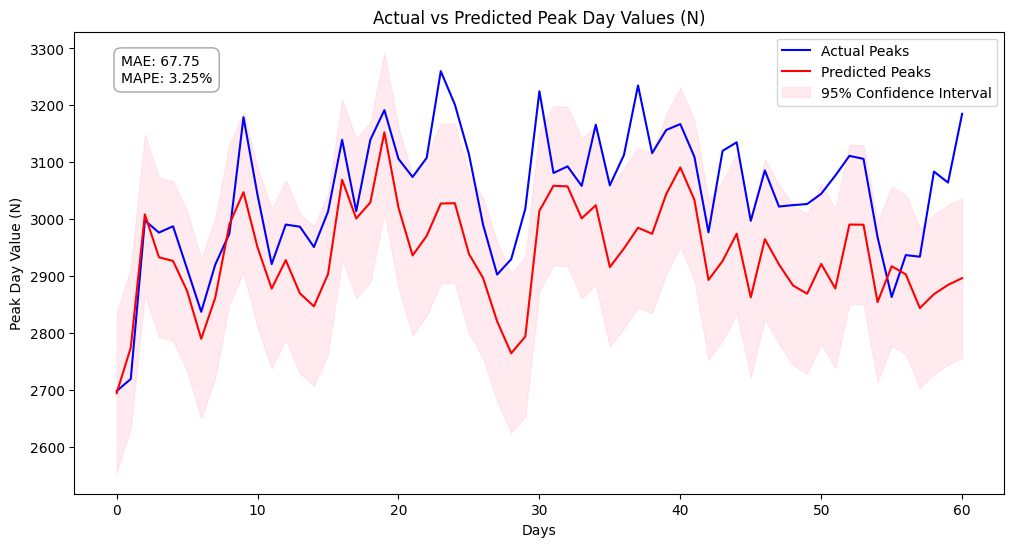

In [ ]:
residuals = actual_peaks_original - peak_values_original
std_residual = np.std(residuals)
lower_bound = peak_values_original - 1.96 * std_residual
upper_bound = peak_values_original + 1.96 * std_residual

plt.figure(figsize=(12, 6))

#Plotting the actual and predicted peaks
plt.plot(actual_peaks_original, label="Actual Peaks", color='blue')
plt.plot(peak_values_original, label="Predicted Peaks", color='red')

plt.fill_between(range(len(peak_values_original)), lower_bound, upper_bound, color='pink', alpha=0.3, label="95% Confidence Interval")

plt.title("Actual vs Predicted Peak Day Values (N)")
plt.xlabel("Days")
plt.ylabel("Peak Day Value (N)")
plt.legend()

textstr = f'MAE: {mae_overall:.2f}\nMAPE: {mape_overall:.2f}%'
props = dict(boxstyle='round, pad=0.5', facecolor='white', edgecolor='gray', alpha=0.7)

plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', bbox=props)

plt.show()

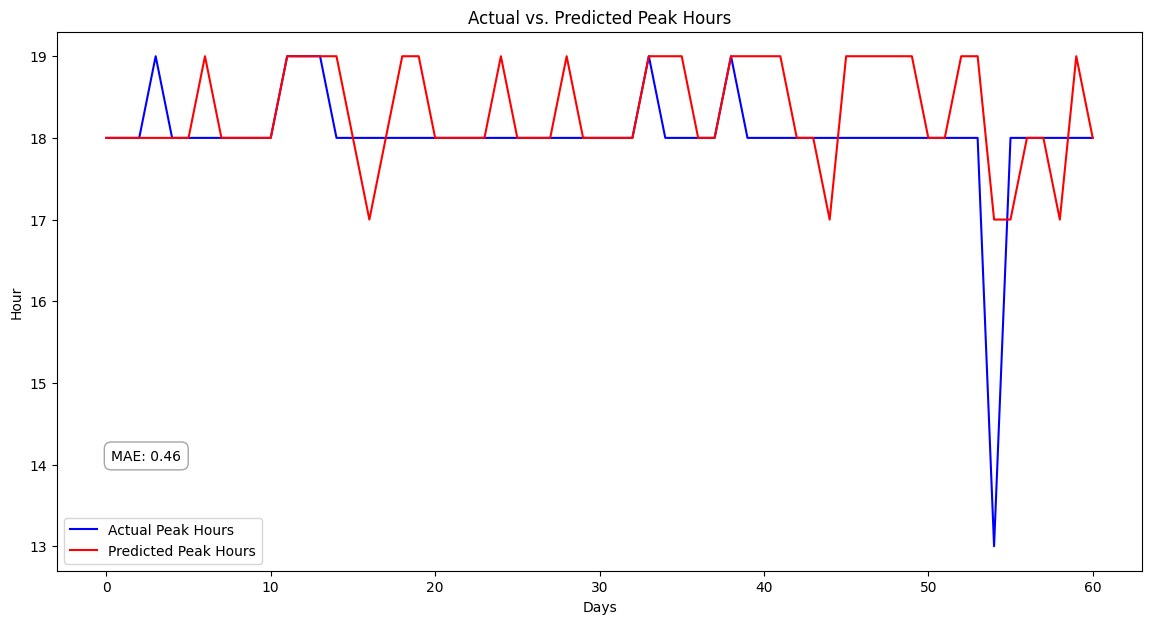

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(actual_peak_hours, label="Actual Peak Hours", color='blue')
plt.plot(peak_hours, label="Predicted Peak Hours", color='red')
plt.title("Actual vs. Predicted Peak Hours")
plt.xlabel("Days")
plt.ylabel("Hour")
plt.legend()

textstr = f'MAE: {mae_peak_hours:.2f}'
props = dict(boxstyle='round, pad=0.5', facecolor='white', edgecolor='gray', alpha=0.7)

plt.text(0.05, 0.2, textstr, transform=plt.gca().transAxes, verticalalignment='bottom', bbox=props)

plt.show()

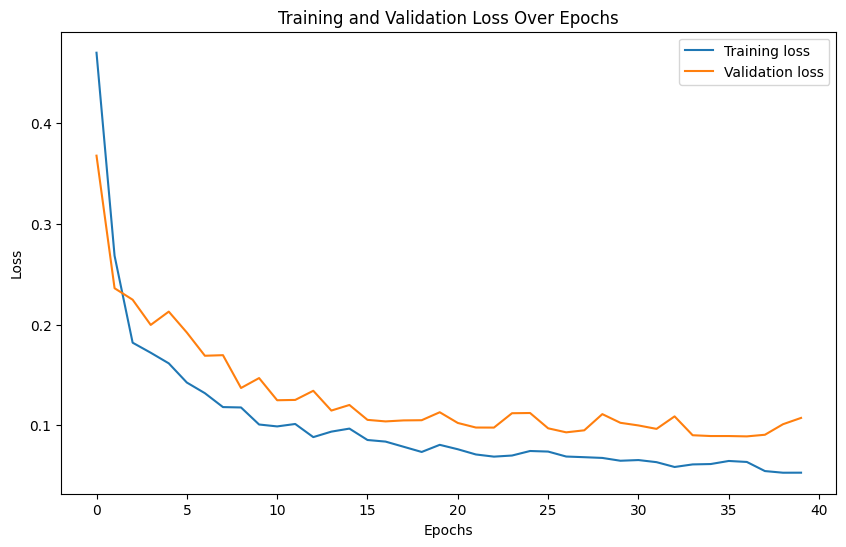

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()